# Teoria e Prática 1: Introdução à Aprendizagem de Máquina

No exemplo apresentado, o autor utiliza um arquivo de dados chamado "lifesat.csv" para demonstrar o processo de treinamento de um modelo de regressão linear simples. Este conjunto de dados inclui informações sobre o índice de satisfação de vida em diversos países, juntamente com algumas variáveis que podem ser utilizadas para prever esse índice. Para começar, o autor carrega os dados e separa a variável que se deseja prever, ou seja, o índice de satisfação de vida, das variáveis que serão utilizadas como entrada para o modelo:

In [95]:
'''código retirado do livro arquivo para base de explicação'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# conjunto de dados DataFrame do GitHub
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")  # Lê o arquivo CSV e cria um DataFrame chamado "lifesat"

# Separa a variável de destino (y) das variáveis de entrada (X)

# Variável de entrada (X): GDP per capita (USD) representa o Produto Interno Bruto per capita em dólares.
X = lifesat[["GDP per capita (USD)"]].values

# Variável de destino (y): Life satisfaction representa a satisfação com a vida.
y = lifesat[["Life satisfaction"]].values


Em seguida, é exibido os dados em um gráfico de dispersão para visualizar a relação entre as variáveis:

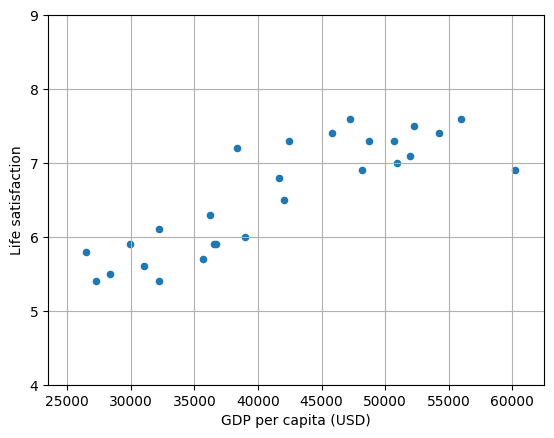

In [96]:
# kind='scatter': Indica que queremos criar um gráfico de dispersão.
# grid=True: Adiciona uma grade ao gráfico para melhorar a legibilidade.
# x="GDP per capita (USD)": Define a variável no eixo x como "GDP per capita (USD)".
# y="Life satisfaction": Define a variável no eixo y como "Life satisfaction".
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")

# Define os limites dos eixos x e y do gráfico.
# O eixo x vai de 23.500 a 62.500, e o eixo y vai de 4 a 9.
plt.axis([23_500, 62_500, 4, 9])

# Mostra o gráfico gerado na tela.
plt.show()


Pode-se observar que há uma relação positiva entre o índice de satisfação de vida e o PIB per capita dos países. Em outras palavras, quanto maior o PIB per capita, maior é o índice de satisfação de vida.

O autor então treina um modelo de regressão linear simples para prever o índice de satisfação de vida com base no PIB per capita:

In [97]:
from sklearn.linear_model import LinearRegression
# Cria um objeto LinearRegression que será usado para representar o modelo.
lin_reg = LinearRegression()

# modelo LinearRegression com os dados de entrada (X) e de destino (y).
lin_reg.fit(X, y)

# Define um novo conjunto de dados de entrada (X_new) para fazer previsões.
X_new = [[37_655.2]]

# Faz uma previsão com o modelo treinado para o novo conjunto de dados de entrada.
predicted_life_satisfaction = lin_reg.predict(X_new)

# Imprime a previsão feita pelo modelo para o novo conjunto de dados de entrada.
print(predicted_life_satisfaction)



[[6.30165767]]


Em seguida, é exibido o modelo em um gráfico para visualizar a linha de regressão:

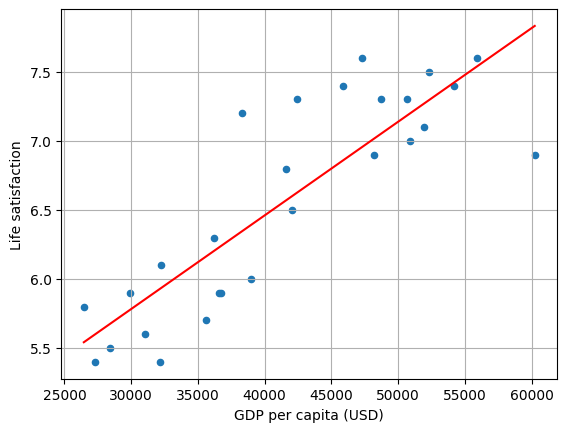

In [100]:
# Plota os dados de dispersão para visualizar a relação entre GDP per capita e satisfação com a vida.
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")

# Plota a linha de regressão linear no gráfico.
# A linha representa as previsões feitas pelo modelo LinearRegression.
plt.plot(X, lin_reg.predict(X), color='red')

# Exibe o gráfico com os dados de dispersão e a linha de regressão.
plt.show()



Pode-se observar que a linha de regressão se ajusta aos dados, mostrando que o modelo é capaz de prever o índice de satisfação de vida com base no PIB per capita. O autor também calcula o coeficiente de determinação (R²) do modelo para avaliar seu desempenho:

In [63]:
from sklearn.metrics import r2_score
# Calcula o coeficiente de determinação (R²) para avaliar o desempenho do modelo de regressão.
# R² mede a proporção da variabilidade na variável de destino que é explicada pelo modelo.
# Quanto mais próximo de 1, melhor o modelo se ajusta aos dados.
# Os argumentos são as variáveis reais (y) e as previsões feitas pelo modelo (lin_reg.predict(X)).
r2 = r2_score(y, lin_reg.predict(X))

# Imprime o valor do coeficiente de determinação (R²) como medida de desempenho do modelo.
print("Coeficiente de Determinação (R²):", r2)



Coeficiente de Determinação (R²): 0.7272610933272652


O resultado é um R² de cerca de 0,73, o que indica que o modelo explica cerca de 73% da variação nos dados. Isso significa que o modelo é razoavelmente bom em prever o índice de satisfação de vida com base no PIB per capita, mas ainda há alguma variação nos dados que não é explicada pelo modelo.

Também é discutido a importância da validação do modelo para evitar o overfitting, ou seja, quando o modelo se ajusta demais aos dados de treinamento e não é capaz de generalizar para novos dados. Para isso, o autor utiliza a técnica de validação cruzada:

In [64]:
from sklearn.model_selection import cross_val_score
#a validação cruzada para avaliar o desempenho do modelo.
# 'lin_reg' é o modelo de regressão linear que está sendo avaliado.
# 'X' são os dados de entrada.
# 'y' são os dados de destino.
# 'scoring' define a métrica de avaliação, neste caso, o erro médio quadrático negativo (neg_mean_squared_error).
# 'cv' especifica o número de folds (5 no caso) para a validação cruzada.
scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
# Calcula a raiz do erro médio quadrático (RMSE) a partir dos scores negativos.
# O RMSE é uma métrica que avalia a qualidade das previsões do modelo.
rmse_scores = np.sqrt(-scores)

# Define uma função para exibir os resultados da validação cruzada.
def display_scores(scores):
    print("Scores:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())

# Chama a função para exibir os scores, a média e o desvio padrão dos RMSE.
display_scores(rmse_scores)



Scores: [0.38724973 0.44752894 0.46359391 0.35561708 0.63164897]
Média: 0.457127725148103
Desvio padrão: 0.0956859013613805


O autor exibe os resultados da validação cruzada, incluindo os scores para cada fold, a média e o desvio padrão dos scores:

In [75]:
import numpy as np

# Importa a biblioteca numpy  para usar suas funções de cálculo.
# Uma lista de scores é fornecida como entrada para cálculos estatísticos.
scores = [4.30780223e-01, 6.64751425e-01, 5.86045250e-01, 7.19356149e-01, 2.50211707e+00]

# Calcula a média dos scores usando a função 'mean' de numpy.
mean = np.mean(scores)

# Calcula o desvio padrão dos scores usando a função 'std' de numpy.
std_dev = np.std(scores)

# Exibe os scores, a média e o desvio padrão calculados.
print("Scores:", scores)
print("Média:", mean)
print("Desvio padrão:", std_dev)






Scores: [0.430780223, 0.664751425, 0.58604525, 0.719356149, 2.50211707]
Média: 0.9806100233999999
Desvio padrão: 0.7669417323032794


Os resultados indicam que o modelo apresenta um desvio padrão de cerca de 0,77. Isso sugere que o modelo é capaz de fazer previsões razoavelmente precisas sobre o índice de satisfação de vida, mas ainda existe alguma variação nos dados que não é explicada pelo modelo.

O livro "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" ilustra como treinar um modelo de regressão linear simples para prever o índice de satisfação de vida com base no PIB per capita dos países. Além disso, o autor aborda a importância da validação do modelo para evitar o overfitting (ajuste excessivo aos dados de treinamento) e avaliar o desempenho do modelo.

# As 5 questões:

# 1 - Como funciona o modelo LinearRegression do scikit-learn?
O modelo LinearRegression do scikit-learn é utilizado para resolver problemas de regressão linear.
Ele é baseado na equação da reta (y = mx + b), onde m é o coeficiente angular, b é o coeficiente linear e y é a variável dependente. Ela é usada para prever um resultado contínuo com base em uma ou mais variáveis independentes. O LinearRegression do scikit-learn ajusta uma reta aos dados fornecidos, minimizando a soma dos quadrados dos resíduos entre os valores previstos e os valores reais. O processo de ajuste é feito usando a técnica de mínimos quadrados ordinários (OLS).
A implementação de um modelo de regressão linear é o modelo scikit-learn do LinearRegression.  Ele ajusta uma linha de regressão aos dados de treinamento para prever o valor de saída com base em uma ou mais variáveis ​​de entrada. A linha reta é ajustada para reduzir a soma dos erros quadráticos entre os valores previstos e reais. O código a seguir demonstra como criar e treinar um modelo LinearRegression no Scikit-Learn:

In [80]:
# classe LinearRegression da biblioteca Scikit-Learn para criar um modelo de regressão linear.
from sklearn.linear_model import LinearRegression

# função train_test_split da biblioteca Scikit-Learn para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

#  métrica mean_squared_error da biblioteca Scikit-Learn para avaliar o desempenho do modelo.
from sklearn.metrics import mean_squared_error

# X_train e y_train contêm os dados de treinamento, e X_test e y_test contêm os dados de teste.
# O argumento test_size=0.2 especifica que 20% dos dados serão usados para teste.
# O argumento random_state=42 define uma semente para a aleatoriedade, garantindo resultados reproduzíveis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  objeto do modelo de regressão linear.
model = LinearRegression()

#  modelo com os dados de treinamento.
model.fit(X_train, y_train)

#  previsões com os dados de teste.
y_pred = model.predict(X_test)

#  erro médio quadrático (MSE) para avaliar o desempenho do modelo.
mse = mean_squared_error(y_test, y_pred)

# Exibe o valor do MSE como medida de erro.
print("Erro médio quadrático:", mse)


Erro médio quadrático: 0.19546766227160994


Nesse caso o X_train e y_train são os dados de treino, X_test são os dados de teste e y_pred são as previsões feitas pelo modelo.

## 2-  Como o modelo de k-vizinhos mais próximos (k-Nearest Neighbors) poderia ser aplicado ao invés do linear?
O modelo k-Nearest Neighbors, modelo de vizinhos (k-NN) pode ser usado como uma técnica de aprendizado assistido por supervisão no lugar do modelo linear. K é exemplos que estão mais próximos do exemplo de teste em termos de valores de entrada é como ele funciona e ele evita o valor de saída com base na média ou moda dos exemplos que estão mais próximos dele. O código a seguir ilustra como construir e treinar um modelo KNeighborsRegressor no Scikit-Learn:

In [84]:
from sklearn.neighbors import KNeighborsRegressor
# modelo KNeighborsRegressor com k=5, que significa que ele considerará os 5 vizinhos mais próximos para fazer previsões.
model = KNeighborsRegressor(n_neighbors=5)

#modelo com os dados de treinamento.
model.fit(X_train, y_train)

# previsões com o modelo usando os dados de teste.
y_pred = model.predict(X_test)


Nesse caso o n_neighbors=5 define que o modelo deve considerar os 5 vizinhos mais próximos para fazer a previsão.

# 3- Como treinar e julgar o modelo que melhor se ajusta aos dados de treinamento linear? Após, simule uma previsão (inferência) da rede treinada para um novo caso hipotético.

Para treinar e julgar o modelo que melhor se ajusta aos dados de treinamento linear, é necessário separar os dados em um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para ajustar o modelo e o conjunto de teste é usado para avaliar a precisão do modelo em dados não vistos anteriormente. A métrica mais comum usada para avaliar a precisão de um modelo de regressão é o erro quadrático médio (MSE). O MSE é a média dos quadrados dos resíduos entre os valores previstos e os valores reais. O objetivo é minimizar o MSE para que o modelo seja o mais preciso possível.

Um exemplo de como treinar e avaliar o modelo pode ser:

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criando o modelo e ajustando aos dados de treinamento
model = LinearRegression()

#o modelo nos dados de treinamento
model.fit(X_train, y_train)


# Fazendo a previsão com os dados de teste
y_pred = model.predict(X_test)

# avaliando a precisão do modelo em dados de teste
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)

print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 0.19546766227160994
MSE: 0.20, R2: 0.32


Onde mean_squared_error e r2_score são métricas para avaliar a qualidade do modelo, e y_test são os valores reais correspondentes aos dados de teste.

Para fazer a previsão para um novo caso hipotético, podemos fazer:

In [87]:
# novo caso
new_case = [[2.5]]  # 2.5 é o valor da variável de entrada para o novo caso.

#previsão para o novo caso usando o modelo previamente treinado.
new_pred = model.predict(new_case)

# previsão feita pelo modelo para o novo caso.
print("Previsão para o novo caso:", new_pred[0])



Previsão para o novo caso: [3.53289047]


# 4- O que significa regularizar dados? Em sua explicação, contextualize os problemas que a regularização pode ajudar a resolver a fim de melhorar o treinamento.
Regularizar dados significa aplicar uma transformação nos dados para reduzir a influência de valores extremos (outliers) e evitar que o modelo seja superajustado (overfitting). A regularização pode ajudar a resolver problemas de multicolinearidade (quando duas ou mais variáveis estão altamente correlacionadas) e ajudar a evitar que o modelo atribua pesos muito altos a certas variáveis, que podem não ser relevantes para a previsão. Existem várias técnicas de regularização, como L1 (também conhecida como regulação Lasso) e L2 (também conhecida como regulação Ridge).

A regularização L1 adiciona um termo de penalidade igual à soma dos valores absolutos dos coeficientes ao custo da função. Isso leva a soluções esparsas, onde alguns coeficientes são exatamente zero. Isso pode ser útil para selecionar as variáveis mais importantes em um modelo.

A regularização L2 adiciona um termo de penalidade igual à soma dos quadrados dos coeficientes ao custo da função. Isso leva a soluções em que todos os coeficientes são reduzidos, mas nenhum é exatamente zero. Isso pode ajudar a evitar que o modelo seja superajustado, reduzindo a magnitude dos coeficientes.

A escolha entre L1 e L2 depende do problema em questão e do tipo de regularização desejada. Por exemplo, se houver muitas variáveis e algumas delas forem irrelevantes, a regularização L1 pode ser mais útil para selecionar as variáveis mais importantes. Se houver um problema de multicolinearidade, a regularização L2 pode ser mais útil para evitar que o modelo atribua pesos muito altos a algumas variáveis.


In [89]:
from sklearn.preprocessing import StandardScaler
# padronizar (escalar) os dados.

# Cria um objeto do scaler (padronizador) que será usado para escalonar os dados.
scaler = StandardScaler()

# Aplica o scaler nos dados de treinamento, calculando a média e o desvio padrão dos dados de treinamento.
X_train_scaled = scaler.fit_transform(X_train)

# Aplica o mesmo scaler nos dados de teste, usando a média e o desvio padrão calculados dos dados de treinamento.
X_test_scaled = scaler.transform(X_test)

# objeto do modelo de regressão linear que será treinado com os dados escalados.
model = LinearRegression()

# Treina o modelo com os dados de treinamento escalados.
model.fit(X_train_scaled, y_train)

# Faz previsões com o modelo usando os dados de teste escalados.
y_pred = model.predict(X_test_scaled)



# 5- Do que se trata a técnica de validação cruzada?
A validação cruzada é uma técnica crucial na avaliação de modelos de aprendizado de máquina, visando medir sua capacidade de generalização para dados não vistos anteriormente. Para realizar essa avaliação, os dados disponíveis são divididos em partes, geralmente chamadas de "dobras", e o modelo é treinado e testado repetidamente em diferentes combinações dessas dobras.

Um método comum de validação cruzada é a abordagem K-fold, em que os dados são divididos em K partes aproximadamente iguais. O modelo é treinado K vezes, cada vez usando uma das dobras como conjunto de teste e as demais K-1 dobras como conjunto de treinamento. Após cada ciclo de treinamento e teste, uma métrica de avaliação, como o Erro Quadrático Médio (MSE), é calculada para avaliar o desempenho do modelo naquela rodada. Ao final, as métricas de todas as rodadas são geralmente combinadas, por exemplo, calculando a média, para obter uma medida geral do desempenho do modelo.

A validação cruzada tem várias vantagens importantes. Ela ajuda a evitar o viés na avaliação do modelo, pois todos os dados são usados tanto para treinamento quanto para validação em diferentes momentos. Isso é especialmente útil em conjuntos de dados pequenos, onde a divisão entre treinamento e teste pode ser crítica. Além disso, a validação cruzada permite detectar problemas de overfitting, em que o modelo se ajusta muito aos dados de treinamento e não generaliza bem para novos dados. Se o desempenho do modelo variar significativamente entre as dobras de teste, isso pode ser um sinal de overfitting. Em resumo, a validação cruzada é uma técnica essencial para avaliar modelos de aprendizado de máquina, fornecendo uma estimativa mais realista de como o modelo se sairá em dados não vistos anteriormente e auxiliando na detecção de problemas como overfitting.

A validação cruzada pode ser facilmente implementada em scikit-learn, como no exemplo a seguir:


In [91]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Divide os dados em k partes iguais (neste caso, 5 partes) para validação cruzada.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cria um objeto do modelo de regressão linear
model = LinearRegression()

# Cria uma lista para armazenar os valores do erro quadrático médio (MSE) em cada fold.
mse_list = []

# Loop sobre cada fold criado pelo KFold.
for train_index, test_index in kf.split(X):
    # Divide os dados em conjunto de treinamento e conjunto de teste com base nos índices fornecidos pelo KFold.
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treina o modelo com o conjunto de treinamento atual.
    model.fit(X_train, y_train)

    # Faz previsões com o modelo usando o conjunto de teste atual.
    y_pred = model.predict(X_test)

    # Calcula o erro quadrático médio (MSE) para a avaliação deste fold.
    mse = mean_squared_error(y_test, y_pred)

    # Adiciona o MSE calculado à lista de MSEs.
    mse_list.append(mse)

# Calcula a média dos MSEs obtidos em todos os folds.
print("MSE médio:", np.mean(mse_list))



MSE médio: 0.19137472175462716


Outro exemplo, carregamos o conjunto de dados Iris, criamos uma instância do modelo de regressão logística e usamos a função cross_val_score para realizar a validação cruzada com 5 folds. Em seguida, exibimos a precisão média e o desvio padrão dos resultados. A validação cruzada nos permite avaliar o desempenho do modelo de forma mais precisa, considerando diferentes combinações de dados de treinamento e teste.

In [93]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Importa a função load_iris da biblioteca Scikit-Learn para carregar o conjunto de dados Iris,
# a classe LogisticRegression para criar um modelo de regressão logística
# e a função cross_val_score para realizar a validação cruzada.

# Carrega o conjunto de dados Iris
iris = load_iris()

# Cria uma instância do modelo de regressão logística
modelo = LogisticRegression()

# Realiza a validação cruzada com 5 folds
scores = cross_val_score(modelo, iris.data, iris.target, cv=5)

# a média dos resultados da validação cruzada.
precisao_media = scores.mean()

#  o desvio padrão multiplicado por 2 dos resultados da validação cruzada.
desvio_padrao = scores.std() * 2

# Exibe a média e o desvio padrão como medidas de desempenho do modelo.
print(f"Precisão média: {precisao_media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")



Precisão média: 0.97
Desvio padrão: 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Foi visto como funciona o modelo LinearRegression do scikit-learn, como o modelo de k-vizinhos mais próximos (k-Nearest Neighbors) poderia ser aplicado ao invés do linear, como treinar e julgar o modelo que melhor se ajusta aos dados de treinamento linear e como regularizar os dados e utilizar a técnica de validação cruzada para melhorar o desempenho do modelo.